<center><img src="images/banner2.png" width="100%%" height="100%"></center>


MSDS 2023 Term 4 ML3 | **Maria Loraine R. Menorca**

***

In a world captivated by the wonders of chatGPT, the possibilities of large language models have expanded beyond words. The ability to receive instant responses and meaningful insights has revolutionized our interactions with technology, reducing the need to comb through vast amounts of information through traditional search engines.

But what if we could take it a step further? What if, with a simple prompt, we could unlock the same power of chatGPT to ***generate immediate responses*** not through mere text, but ***through stunning images that bring our queries to life?*** Imagine the potential this holds - a world where words seamlessly transform into captivating visuals, transcending industries like e-commerce, creative design, gaming, and virtual realms.

Enter the realm of text-to-image generation, where the boundaries of imagination are pushed to new heights! From transforming e-commerce experiences with virtual product try-ons, to fueling creative design with on-demand visual inspiration, and immersing ourselves in captivating virtual worlds, the applications of ✨text-to-image generation✨ are as diverse as our imagination.

**Note:**
This post references the discussion on the concepts behind Stable Diffusion from the following works:

[`Stable Diffusion with 🧨 Diffusers`](https://huggingface.co/blog/stable_diffusion) | [`Annotated Diffusion`](https://huggingface.co/blog/annotated-diffusion) | [`Diffusers`](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb)


The visualizations are lifted from the original work of Jay Alammar in his blog: [`The Illustrated Stable Diffusion`](https://jalammar.github.io/illustrated-stable-diffusion/) 

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">What is Stable Diffusion?</h1>

Let's first define what diffusion models are: Diffusion models operate by gradually introducing random noise to the data and then learning to reverse this process to generate the desired data samples from the noise.

Stable diffusion, specifically, focuses on the process of converting a text prompt into an image. It employs a sequential approach where diffusion steps are applied in a progressive manner, refining an initial noise and transforming it gradually into a realistic image that aligns with the given prompt.

<!-- ![image.png](attachment:image.png) -->

<span style="color:#f26419; font-size:20px"><i>What are its components?</i></span>

<br>

<center><img src="images/pipeline.png" width="70%%" height="70%"></center>

1. **Autoencoder (VAE)**

   The autoencoder in Stable diffusion, specifically the Variational Autoencoder (VAE), consists of an encoder and a decoder. The encoder converts images into a low-dimensional latent representation, while the decoder transforms the latent representation back into images.

    During training, the encoder is used to obtain latent representations for the forward diffusion process, which applies increasing noise at each step. During inference, the decoder is used to convert denoised latents generated by the reverse diffusion process back into images. Inference only requires the VAE decoder.

2. **U-Net**

    The U-Net consists of an encoder and a decoder, both composed of ResNet blocks. The encoder compresses an image representation into a lower resolution representation, while the decoder decodes the lower resolution representation back to the original higher resolution representation, which is expected to be less noisy.

    To preserve important information during downsampling, short-cut connections are added between the downsampling ResNets of the encoder and the upsampling ResNets of the decoder. In addition, the stable diffusion U-Net can incorporate text embeddings through cross-attention layers. These cross-attention layers are inserted between ResNet blocks in both the encoder and decoder parts of the U-Net.

3. **The Text-Encoder**

    The text-encoder is responsible for converting the input prompt, such as "An astronaut riding a horse," into a latent representation that can be understood by the U-Net model. Typically, a transformer-based encoder is used to process the input text and generate a sequence of latent text embeddings.

    In the case of Stable Diffusion, the text-encoder is not trained during the training process. Instead, a pre-trained text encoder model like CLIPTextModel from CLIP is used to obtain the text embeddings. This allows the text-encoder to leverage the knowledge learned from a large corpus of text data without the need for additional training.

<span style="color:#f26419; font-size:20px"><i>How does it work?</i></span>

For each image in the training dataset, a corresponding amount of random noise is generated and added to the image (i.e., ***forward diffusion***). This process can be repeated for multiple images to create a collection of training examples.

<br>

<center><img src="images/method_stablediffusion_1.png" width="70%%" height="70%"></center>

Given the collected training set, we can train a model to predict noise (i.e., ***Noise Predictor***), and compare it to actual noise by calculating the loss. The model would then be updated via backpropagation.

<br>

<center><img src="images/method_stablediffusion_2.png" width="70%%" height="70%"></center>

<span style="color:#f26419; font-size:20px"><i>How does it generate images?</i></span>

The trained noise predictor takes in a noisy image and the number of denoising steps to predict a sample of the noise. This sample is subtracted from the image by removing it from the distribution, making the image look more closely to the images the model was trained on. This process is called ***Reverse Diffusion or Denoising***.

<br>

<center><img src="images/method_stablediffusion_3.png" width="70%%" height="70%"></center>

<span style="color:#f26419; font-size:20px"><i>What's the role of Latents?</i></span>

Because the denoising process is done iteratively and can be computationally expensive, Rombach, et. al.'s paper on [`High-Resolution Image Synthesis with Latent Diffusion Models`](https://arxiv.org/abs/2112.10752) proposed to run the Stable Diffusion process on a compressed version of the image instead of the pixels themselves. This compression is done via an Autoencoder which compresses an image into the latent space using its encoder, then reconstructs it using only the key features via the decoder.

Since the forward diffusion process is now applied on the latents and not the pixel images, the noise predictor is also trained on the compressed space.

<br>

<center><img src="images/method_stablediffusion_4.png" width="70%%" height="70%"></center>

Once the model is trained, images are generated by running the reverse process. That is, from encoder to decoder. More formally, this flow from encoder to decoder is shown in the architecture proposed by the Stable Diffusion paper mentioned previously.

<br>

<center><img src="images/method_stablediffusion_5.png" width="70%" height="70%"></center>

<br>

<center><img src="images/architecture.png" width="70%" height="70%"></center>

<span style="color:#f26419; font-size:20px"><i>What's the role of Latents?</i></span>

Because the denoising process is done iteratively and can be computationally expensive, Rombach, et. al.'s paper on [`High-Resolution Image Synthesis with Latent Diffusion Models`](https://arxiv.org/abs/2112.10752) proposed to run the Stable Diffusion process on a compressed version of the image instead of the pixels themselves. This compression is done via an Autoencoder which compresses an image into the latent space using its encoder, then reconstructs it using only the key features via the decoder.

Since the forward diffusion process is now applied on the latents and not the pixel images, the noise predictor is also trained on the compressed space.

<br>

<center><img src="images/method_stablediffusion_6.png" width="70%%" height="70%"></center>

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">Textual Prompts</h1>

<span style="color:#f26419; font-size:20px"><i>How are they processed?</i></span>

The text encoder in the architecture shown is a transformer language model that takes in a prompt and produces token embeddings to understand its context. The model used in the `PyTorch` implementatoin is **ClipText**, while the published paper used **BERT**.

**CLIP** is a combination of an image encoder a text encoder since it was trained on a dataset of images and their captions. The two encoders' resulting embeddings were compared using Cosine similarity. The model was then updated afterwards.

<br>

<center><img src="images/method_stablediffusion_5.png" width="80%" height="80%"></center>

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">Image Generation</h1>

The input of the noise predictor was adjusted to allow for texts as an input. This added support for text inputs is called ***text conditioning***.

<br>

<center><img src="images/method_stablediffusion_4.png" width="80%" height="80%"></center>

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">Usage</h1>

The Stable Diffusion is implemented in PyTorch and is hosted as a library in `HuggingFace`. This section follows the blog post [`Stable Diffusion with 🧨 Diffusers`](https://huggingface.co/blog/stable_diffusion) closely. For more details, the original post can be referred to.

In [2]:
# install these before proceeding
# ! pip install diffusers==0.10.2 transformers scipy ftfy accelerate

In [ ]:
# Import libraries
from tqdm.auto import tqdm
from PIL import Image
import numpy as np
import torch
import os

from diffusers import StableDiffusionPipeline
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import (AutoencoderKL, UNet2DConditionModel,
                       PNDMScheduler, LMSDiscreteScheduler)

In [15]:
randseed = 143

# define what device the model is running on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Running on device: {}'.format(device))

# to solve permission errors
os.environ['XDG_CACHE_HOME'] = '/home/msds2023/mmenorca/.cache'

Running on device: cuda


<h2 style="color:#003b7f">Implementation</h2>

The `StableDiffusionPipeline.from_pretrained` holds the pretrained model loaded from the `CompVis/stable-diffusion-v1-4`.

The `revision` parameter indicates the revision or version of the model to be loaded. For our case, it was specified as "fp16" indicating that the model weighsts are stored in a half-precision format. Doing so can help reduce memory usage and improve performance.

In [10]:
# Pipiline for the task
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               revision="fp16", torch_dtype=torch.float32)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [17]:
# Input prompt
prompt = "Create an image of a cozy and oversized knit sweater in neutral tones."

generator = torch.manual_seed(randseed) 
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=50, generator=generator).images[0]

  0%|          | 0/15 [00:00<?, ?it/s]

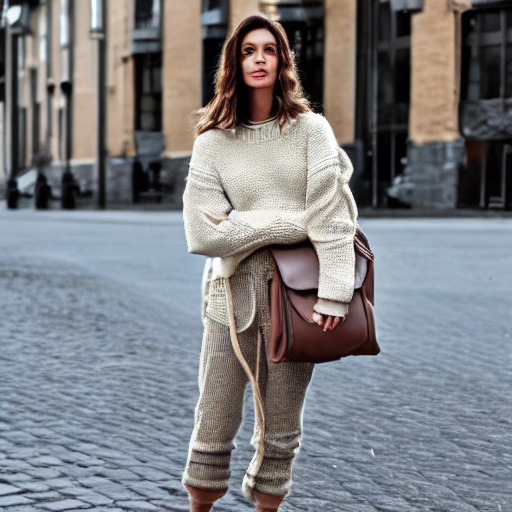

In [19]:
image

`num_inference_steps`: Determines the number of denoising steps or iterations performed during the diffusion process. Increasing this value, such as to 50, generally leads to higher-quality generated images.

`guidance_scale`: Controls the strength of adherence to the conditional signal (text prompt) used to guide the image generation. Higher values, typically between 7 and 8.5, result in better alignment with the prompt but may impact image quality or diversity.

<span style="color:#f26419; font-size:18px"><i>Fashion & e-Commerce</i></span>

For the sample prompt, I asked for a recommendation on what would go well with green wide pants to check the capability of the model to generate similar items to the query. Despite being in low resolution and incomplete facial features, the generated images were aligned with the input prompts. In the context of Fashion or e-Commerce industry, the model can generate realistic images of a person wearing the queried item, allowing users ot virtually try on clothes before making a purchase. It can also be extended to getting personalized recommendations based on what items the user likes or asks about.

In [21]:
# Input prompt
prompt = "Show me what goes well with green wide pants for ladies."

generator = torch.manual_seed(randseed) 
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=50, generator=generator).images[0]

# Save the image
# i = 5
image.save(f"data/clothes/test/0{i}.png")
i += 1

  0%|          | 0/50 [00:00<?, ?it/s]

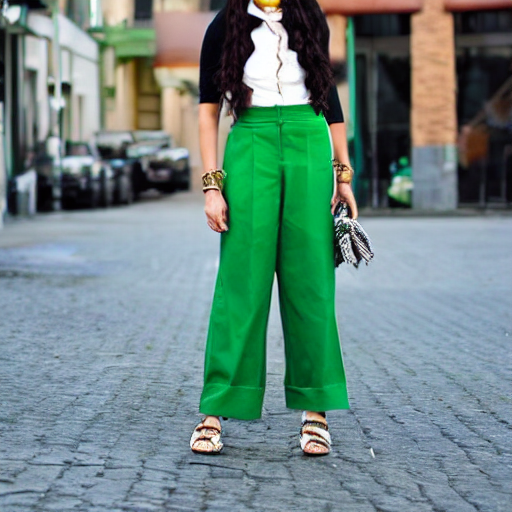

In [22]:
image

<h2 style="color:#003b7f">Custom Implementation</h2>

For this part, we customize parameters and components of the architecture such as the VAE and the scheduler.

In [27]:
# Improt libraries
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import (AutoencoderKL, UNet2DConditionModel,
                       PNDMScheduler, LMSDiscreteScheduler)
from tqdm.auto import tqdm

from PIL import Image

In [28]:
# 1. Load the autoencoder model which will be used to decode the latents into image space. 
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

# 2. Load the tokenizer and text encoder to tokenize and encode the text. 
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# 3. The UNet model for generating the latents.
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                            subfolder="unet")

# 4. Define the scheduler
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012,
                                 beta_schedule="scaled_linear",
                                 num_train_timesteps=1000) # 1000

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.23.self_attn.out_proj.bias', 'vision_model.encoder.layers.11.mlp.fc1.bias', 'vision_model.encoder.layers.2.self_attn.k_proj.bias', 'vision_model.encoder.layers.12.layer_norm1.bias', 'vision_model.encoder.layers.10.layer_norm1.bias', 'vision_model.encoder.layers.17.self_attn.k_proj.bias', 'vision_model.encoder.layers.20.layer_norm1.weight', 'vision_model.encoder.layers.16.mlp.fc1.bias', 'vision_model.encoder.layers.16.self_attn.v_proj.weight', 'vision_model.encoder.layers.7.self_attn.q_proj.weight', 'vision_model.encoder.layers.0.layer_norm2.weight', 'vision_model.encoder.layers.21.layer_norm2.bias', 'vision_model.encoder.layers.20.layer_norm1.bias', 'vision_model.encoder.

In [29]:
# Move tasks to GPU
torch_device = "cuda"
vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device) 

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (attn1): CrossAttention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_features=320, bias=False)
                (to_out): ModuleList(
          

In [38]:
def stable_diffusion(prompt, height, width, num_inference_steps,
                     guidance_scale, batch_size):
    """
    Return the image generated using Stable Diffusion.
    
    Parameters:
    ---------------
    prompt (str):
        The input prompt or text description.
    
    height (int):
        The desired height of the generated image.

    width (int):
        The desired width of the generated image.
    
    num_inference_steps (int):
        The number of inference steps to perform during diffusion.
    
    guidance_scale (float):
        The scale factor for guiding the generation process based on the prompt.
    
    batch_size (int):
        The batch size for generating the image.

    Returns:
    --------------
    image (torch.Tensor):
        The generated image as a Torch Tensor object.
    """
    text_input = tokenizer(prompt, padding="max_length",
                           max_length=tokenizer.model_max_length,
                           truncation=True, return_tensors="pt")

    text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

    # 
    max_length = text_input.input_ids.shape[-1]
    uncond_input = tokenizer(
        [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
    )

    uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]
    text_embeddings = torch.cat([uncond_embeddings, text_embeddings])
    
    #
    latents = torch.randn(
                (batch_size, unet.in_channels, height // 8, width // 8),
                generator=generator,
                )
    latents = latents.to(torch_device)
    latents = latents * scheduler.init_noise_sigma
    
    # Train the model
    for t in tqdm(scheduler.timesteps):
        # expand the latents if we are doing classifier-free guidance
        # to avoid doing two forward passes.
        latent_model_input = torch.cat([latents] * 2)

        latent_model_input = scheduler.scale_model_input(latent_model_input, t)

        # predict the noise residual
        with torch.no_grad():
            noise_pred = unet(latent_model_input, t,
                          encoder_hidden_states=text_embeddings).sample

        # perform guidance
        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text -
                                                           noise_pred_uncond)

        # compute the previous noisy sample x_t -> x_t-1
        latents = scheduler.step(noise_pred, t, latents).prev_sample
        
    # scale and decode the image latents with vae
    latents = 1 / 0.18215 * latents
    with torch.no_grad():
        image = vae.decode(latents).sample
        
    return image

def convert_img(image):
    """
    Convert image from Tensor object to PIL.

    Parameters:
    --------------
    image (torch.Tensor):
        The image as a Torch Tensor object.

    Returns:
    --------------
    images (list[PIL.Image]):
        The list of converted PIL images.
    """
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
    images = (image * 255).round().astype("uint8")
    return [Image.fromarray(image) for image in images]

<span style="color:#f26419; font-size:18px"><i>IT & Development</i></span>

Businesses can use text-to-image Stable Diffusion to generate product mockups, eliminating the need for physical prototypes. With just textual descriptions of products, companies can create realistic images for various purposes such as marketing materials, online catalogs, and product presentations. This application not only enhances visual representation but also helps reduce operational expenses associated with producing physical prototypes.

For this sample, I asked the model to give me a mockup of a mobile application detailing a customer's journey from the landing page up to a purchase. The result can be further improved by tweaking the query and making it more specific, or tuning the hyperparameters.

In [31]:
# Define hyperparameters
prompt = ["Can you show sample mockup of a mobile app's customer journey?" \
          "From landing page, registration, to purchase."] 

height = 512 # default height of Stable Diffusion
width = 512  # default width of Stable Diffusion

num_inference_steps = 2500  # Number of denoising steps

guidance_scale = 7.5 # Scale for classifier-free guidance

generator = torch.manual_seed(randseed) # Seed generator to create the inital latent noise

batch_size = len(prompt)

scheduler.set_timesteps(num_inference_steps)

In [33]:
# Run diffusion process
image = stable_diffusion(prompt, height, width, num_inference_steps,
                         guidance_scale, batch_size)

  0%|          | 0/2500 [00:00<?, ?it/s]

/home/msds2023/mmenorca/.local/lib/python3.10/site-packages/diffusers/schedulers/scheduling_lms_discrete.py:154: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrated_coeff = integrate.quad(lms_derivative, self.sigmas[t], self.sigmas[t + 1], epsrel=1e-4)[0]
/home/msds2023/mmenorca/.local/lib/python3.10/site-packages/diffusers/schedulers/scheduling_lms_discrete.py:154: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrated_coeff = integrate.quad(lms_derivat

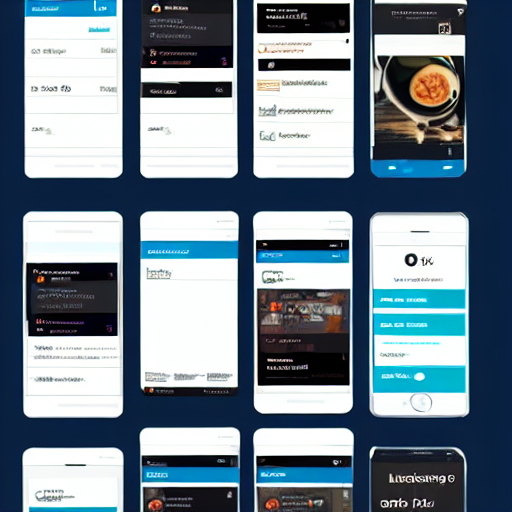

In [34]:
# View the generated image
pil_images = convert_img(image)
pil_images[0]

In [35]:
# Save the image
# i = 0
pil_images[0].save(f"data/random/test/0{i}.png")
i += 1

<span style="color:#f26419; font-size:18px"><i>Creative Design</i></span>

Artists and designers can utilize the capabilities of text-to-image Stable Diffusion to give form to their creative visions. With the ability to input textual prompts, they can generate captivating visual representations of their ideas, serving as a springboard for further artistic exploration and expression.

For this use case, I asked for a sample poster, which is often asked for public presentations 👀, to look for a starting idea.

In [40]:
# Define hyperparameters
prompt = ["Can you show sample poster for a pitch presentation about anomaly detection?" \
          "Be specific with the contents."] 

height = 512 # default height of Stable Diffusion
width = 512  # default width of Stable Diffusion

num_inference_steps = 2500  # Number of denoising steps

guidance_scale = 7.5 # Scale for classifier-free guidance

generator = torch.manual_seed(randseed) # Seed generator to create the inital latent noise

batch_size = len(prompt)

scheduler.set_timesteps(num_inference_steps)

In [41]:
# Run diffusion process
image = stable_diffusion(prompt, height, width, num_inference_steps,
                         guidance_scale, batch_size)

  0%|          | 0/2500 [00:00<?, ?it/s]

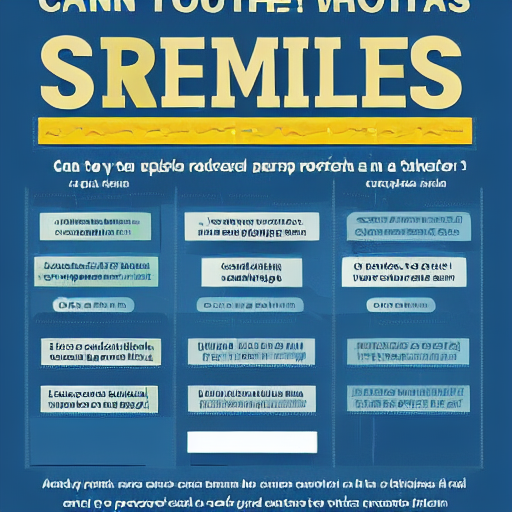

In [42]:
# View the generated image
pil_images = convert_img(image)
pil_images[0]

In [43]:
# Save the image
# i = 0
pil_images[0].save(f"data/random/test/0{i}.png")
i += 1

<span style="color:#f26419; font-size:18px"><i>Visual Storytelling</i></span>

Authors and storytellers can elevate their narratives with the help of text-to-image Stable Diffusion. By generating images that align with specific scenes or characters through textual prompts, they can enrich their storytelling with compelling visual elements. This immersive experience engages readers on a deeper level, bringing the story to life in their minds.

For this example, I challenged the model by asking it animate a specific scene from the hit Filipino movie: One More Chance. It wasn't able to replicate the exact setting but was able to capture the general tone of the scene. I might be biased but I think the clothes in the generated image follow closely the actual clothes worn by the whole gang in another scene. 😎

In [44]:
# Define hyperparameters
prompt = ["I want to animate a scene in the Filipino movie: One More Chance." \
          "Can you visualize the scene where the male lead tells the female" \
          "lead: 'She loved me at my worst. You had me at my best." \
          "At binalewala mo lang lahat yun… And you chose to break my heart'"] 

height = 512 # default height of Stable Diffusion
width = 512  # default width of Stable Diffusion

num_inference_steps = 2500  # Number of denoising steps

guidance_scale = 7.5 # Scale for classifier-free guidance

generator = torch.manual_seed(randseed) # Seed generator to create the inital latent noise

batch_size = len(prompt)

scheduler.set_timesteps(num_inference_steps)

In [45]:
# Run diffusion process
image = stable_diffusion(prompt, height, width, num_inference_steps,
                         guidance_scale, batch_size)

  0%|          | 0/2500 [00:00<?, ?it/s]

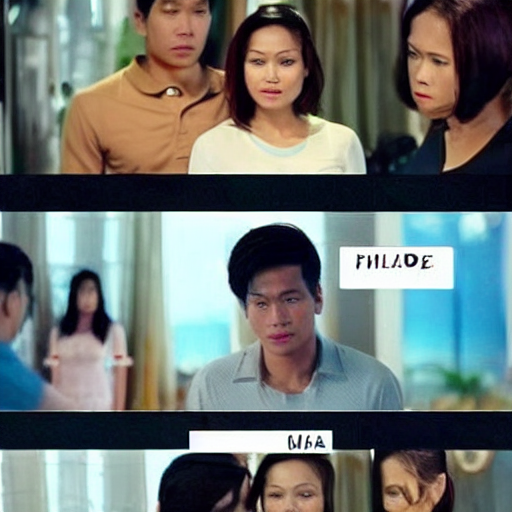

In [46]:
# View the generated image
pil_images = convert_img(image)
pil_images[0]

In [47]:
# Save the image
# i = 0
pil_images[0].save(f"data/random/test/0{i}.png")
i += 1

<span style="color:#f26419; font-size:18px"><i>Games & Virtual Reality</i></span>

Text-to-image Stable Diffusion presents an exciting opportunity to populate gaming environments and virtual worlds with visually captivating and authentic characters, objects, and landscapes. By providing textual descriptions of desired elements, the model can generate corresponding images that enhance the overall visual experience for players. This technology opens up new possibilities for creating immersive and visually diverse gaming worlds.

For the final example, I asked the model to create a sample environment or world if I were to create a game out of one of my favorite anime, One Piece. The title and characters needs a lot of improvement, but what's interesting is, the generated image was able to capture the key features of each. Even with the "crappy" drawing, we could tell that it's Luffy and Zoro because of the straw hat and sword, respectively.

In [48]:
# Define hyperparameters
prompt = ["I want to create a game for the anime 'One Piece'." \
          "Can you create a sample environment or world with the" \
          "main characters in it?"] 

height = 512 # default height of Stable Diffusion
width = 512  # default width of Stable Diffusion

num_inference_steps = 2500  # Number of denoising steps

guidance_scale = 7.5 # Scale for classifier-free guidance

generator = torch.manual_seed(randseed) # Seed generator to create the inital latent noise

batch_size = len(prompt)

scheduler.set_timesteps(num_inference_steps)

In [49]:
# Run diffusion process
image = stable_diffusion(prompt, height, width, num_inference_steps,
                         guidance_scale, batch_size)

  0%|          | 0/2500 [00:00<?, ?it/s]

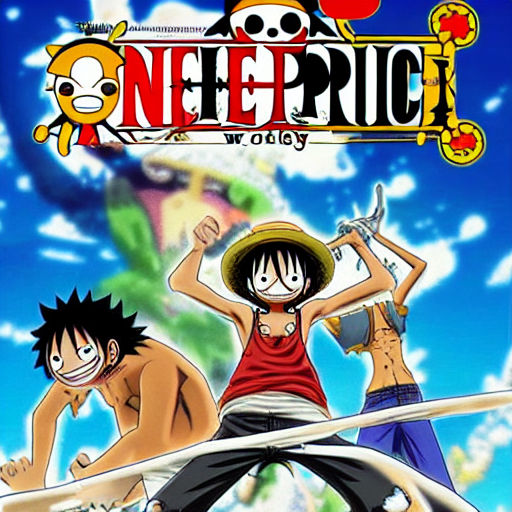

In [50]:
# View the generated image
pil_images = convert_img(image)
pil_images[0]

In [51]:
# Save the image
# i = 0
pil_images[0].save(f"data/random/test/0{i}.png")
i += 1

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">Summary</h1>

While the images generated in this work still has room for improvement, we're still able to show the promising capabilities of Stable Diffusion in various domains including e-commerce, creative design, storytelling, and gaming. It enables the generation of high-quality images based on textual prompts, revolutionizing product visualization, artistic exploration, narrative enrichment, and immersive gaming experiences. The ability to bridge the gap between text and visuals opens up new avenues for creativity, engagement, and efficient prototyping.

Fine-tuning the model's parameters is expected to lead to better outcomes in terms of image quality, diversity, and adherence to the input prompt. Key parameters that can be adjusted include the `num_inference_steps`, `guidance_scale`, `batch_size`, and `text_encoder`. By carefully fine-tuning these parameters, users can achieve more desirable and tailored results according to their specific requirements.

Looking ahead, advancements in Stable Diffusion technology are expected to further enhance the quality, diversity, and realism of generated images. Ongoing research aims to refine the models, improve the conditioning mechanisms, and expand the range of supported input prompts. This paves the way for more sophisticated applications, seamless integration into existing workflows, and the exploration of novel use cases. As the technology continues to evolve, we can anticipate even more exciting developments and transformative impacts across various industries.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">Citations</h1>

Rombach, R. (2021, December 20). High-Resolution Image Synthesis with Latent Diffusion Models. arXiv.org. https://arxiv.org/abs/2112.10752

Stable Diffusion with 🧨 Diffusers. (n.d.). https://huggingface.co/blog/stable_diffusion

The Annotated Diffusion Model. (n.d.). https://huggingface.co/blog/annotated-diffusion

Alammar, J. (n.d.). The Illustrated Stable Diffusion. https://jalammar.github.io/illustrated-stable-diffusion/

Google Colaboratory. (n.d.). https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb